# CycleGAN train

In [2]:
import os
import matplotlib.pyplot as plt

from cyclegan import CycleGAN
from loader import DataLoader

In [7]:

# run params
# dowload data from https://www.kaggle.com/datasets/balraj98/apple2orange-dataset?resource=download
DATA_NAME = 'apple2orange'

RUN_FOLDER = 'archive'

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' # 'build' # 

# data

In [8]:
IMAGE_SIZE = 128

In [9]:

data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))


# architecture

In [10]:
gan = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    ,learning_rate = 0.0002
    , buffer_max_length = 50
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 2
    , generator_type = 'unet'
    , gen_n_filters = 32
    , disc_n_filters = 32
    )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))
    


2024-10-08 15:24:56.495336: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-08 15:24:56.495418: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/manaskumar/Desktop/ML/lib/python3.11/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
gan.g_BA.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_18 (Conv2D)             (None, 64, 64, 32)   1568        ['input_4[0][0]']                
                                                                                                  
 instance_normalization_13 (Ins  (None, 64, 64, 32)  0           ['conv2d_18[0][0]']              
 tanceNormalization)                                                                              
                                                                                            

In [12]:
gan.g_AB.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_10 (Conv2D)             (None, 64, 64, 32)   1568        ['input_3[0][0]']                
                                                                                                  
 instance_normalization_6 (Inst  (None, 64, 64, 32)  0           ['conv2d_10[0][0]']              
 anceNormalization)                                                                               
                                                                                            

In [13]:
gan.d_A.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        1568      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 instance_normalization (Ins  (None, 32, 32, 64)       0         
 tanceNormalization)                                             
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                             

In [14]:
gan.d_B.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        1568      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 instance_normalization_3 (I  (None, 32, 32, 64)       0         
 nstanceNormalization)                                           
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                           

# train

In [15]:
BATCH_SIZE = 1
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 10

TEST_A_FILE = 'n07740461_14740.jpg'
TEST_B_FILE = 'n07749192_4241.jpg'

In [16]:
gan.train(data_loader
        , run_folder = RUN_FOLDER
        , epochs=EPOCHS
        , test_A_file = TEST_A_FILE
        , test_B_file = TEST_B_FILE
        , batch_size=BATCH_SIZE
        , sample_interval=PRINT_EVERY_N_BATCHES)
        

# loss

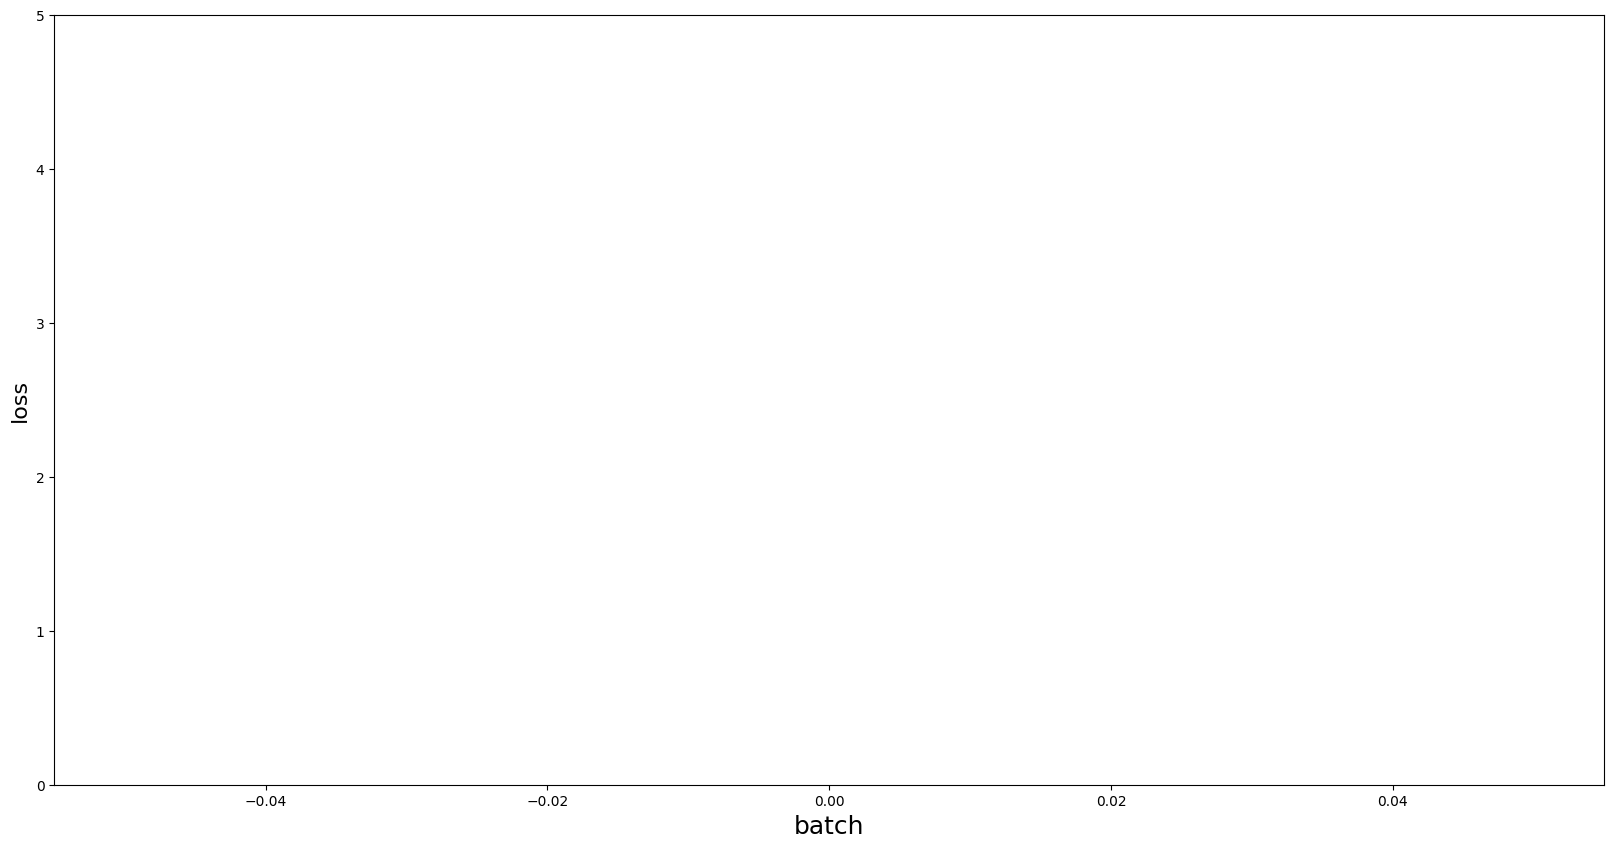

In [17]:
fig = plt.figure(figsize=(20,10))

plt.plot([x[1] for x in gan.g_losses], color='green', linewidth=0.1) #DISCRIM LOSS
# plt.plot([x[2] for x in gan.g_losses], color='orange', linewidth=0.1)
plt.plot([x[3] for x in gan.g_losses], color='blue', linewidth=0.1) #CYCLE LOSS
# plt.plot([x[4] for x in gan.g_losses], color='orange', linewidth=0.25)
plt.plot([x[5] for x in gan.g_losses], color='red', linewidth=0.25) #ID LOSS
# plt.plot([x[6] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.25)

# plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()